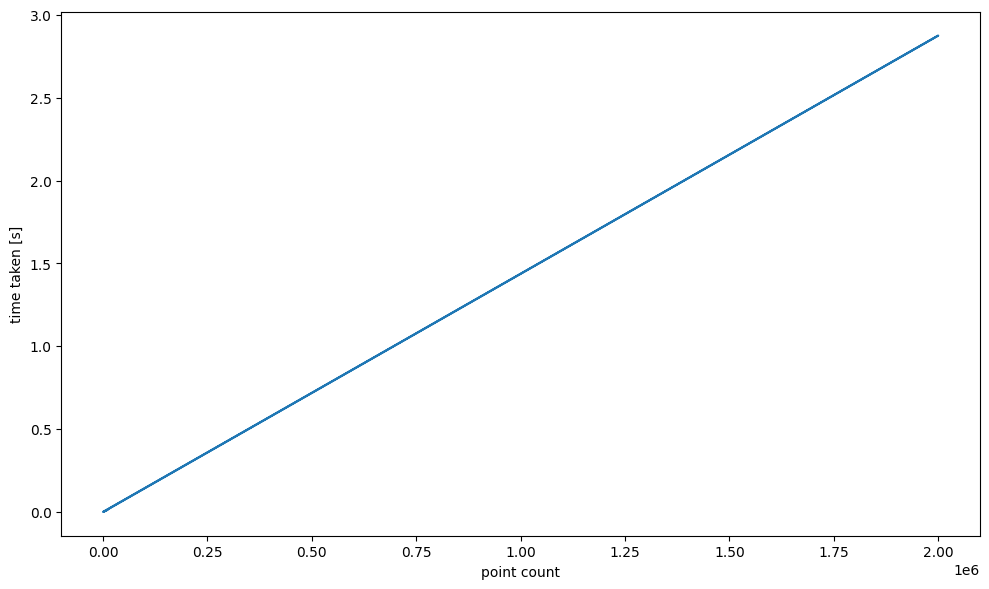

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import re
import glob

header_re = re.compile("^\\((.+)\\) \\[([0-9]+)s([0-9]+)ns\\]: (.+)$")
time_over_point_count = {};
logfiles = glob.glob("../log*");
for filename in logfiles:
    with open(filename) as log:
      for line in log.readlines():
        tag, seconds, nanoseconds, rest = header_re.search(line).groups()
        time = float(seconds) + float(nanoseconds)/1e9
        if tag == 'Timing':
            # sample: recalc_convex_hull took 0s161031ns for 128 points
            seconds, nanos, vert_count = \
              re.search("recalc_convex_hull took (.+)s(.+)ns for (.+) points", rest)\
                .groups();
            time_over_point_count[vert_count] = float(seconds)+float(nanos)/1e9;

plt.figure(figsize=(10,6))

items = list(time_over_point_count.items())
items.sort(key=lambda x: x[0]);
xs = [float(item[0]) for item in items]
vs = [float(item[1]) for item in items]
plt.plot(xs, vs)#, 'time taken')

plt.xlabel("point count")
plt.ylabel("time taken [s]")
plt.tight_layout()
plt.show()


Para esse algoritmo (o incremental), a complexidade esperada é de O(n log n),
já que o algoritmo incremental é O(n) e ordenar os pontos é O(n log n).

A relação entre a envoltória convexa e a diagrama de voronoi, é que os pontos que pertencem à involtória convexa são os pontos que dão origem às células de voronoi que possuem segmentos de linha infinitos na direção do exterior da geometria.

Não existe diferença de custo computacional entre distribuições diferentes de pontos para o algoritmo incremental, ele sempre itera sobre todos os pontos duas vezes.

Em teoria, o tempo de execução deve seguir o seguinte gráfico:

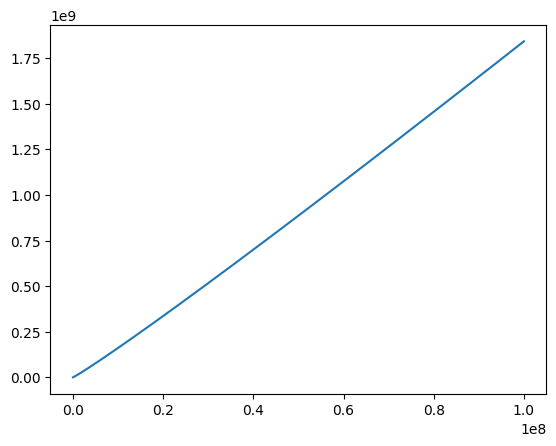

In [17]:
xs = np.arange(0.001, 1e8, 1e1)
ys = xs * np.log(xs)
plt.plot(xs, ys)
plt.show()